In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torchinfo import summary
from torchviz import make_dot
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'


# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
data_root = './data'

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_set = datasets.MNIST(
    root = data_root,
    train = True,
    download = True,
    transform = transform
)

image, label = train_set[0]
print(image.shape)
image = image.view(1, 1, 28, 28)
print(image.shape)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [8]:
conv1 = nn.Conv2d(1, 1, 3)
print(conv1.weight.shape)
print(conv1.weight)
print(conv1.bias)

nn.init.constant_(conv1.bias, 0.0)

torch.Size([1, 1, 3, 3])
Parameter containing:
tensor([[[[-2.7011e-01, -7.2842e-02,  7.4097e-02],
          [ 2.0012e-04,  2.0669e-01,  2.0508e-01],
          [ 2.7979e-01, -2.6942e-01, -2.0805e-01]]]], requires_grad=True)
Parameter containing:
tensor([-0.2683], requires_grad=True)


Parameter containing:
tensor([0.], requires_grad=True)

In [12]:
w1_np = np.array([[0,0,1],
                  [0,1,0],
                  [1,0,0]])
print(w1_np)

w1 = torch.tensor(w1_np).float()
w1 = w1.view(1, 1, 3, 3)
print(w1)
conv1.weight.data = w1
print(conv1.weight)

[[0 0 1]
 [0 1 0]
 [1 0 0]]
tensor([[[[0., 0., 1.],
          [0., 1., 0.],
          [1., 0., 0.]]]])
Parameter containing:
tensor([[[[0., 0., 1.],
          [0., 1., 0.],
          [1., 0., 0.]]]], requires_grad=True)


In [13]:
import cv2

image, label = train_set[0]
image = image.view(1, 1, 28, 28)
w1 = conv1(image)
w2 = conv1(w1)
w3 = conv1(w2)
images = [image, w1, w2, w3]

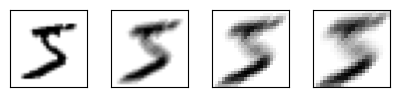

In [14]:
plt.figure(figsize=(5, 1))

for i in range(4):
    size = (28 - i*2)
    ax = plt.subplot(1, 4, i+1)
    img = images[i].data.numpy()
    plt.imshow(img.reshape(size,size), cmap='gray_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
conv1 = nn.Conv2d(3, 32, 3)
relu = nn.ReLU(inplace=True)
conv2 = nn.Conv2d(32, 32, 3)
maxpool = nn.MaxPool2d((2, 2))

conv1.weight.shape

torch.Size([32, 3, 3, 3])

In [24]:
print(conv1)
print()

print(conv1.weight.shape)
print(conv1.bias.shape)
print()

print(conv2)
print(conv2.weight.shape)
print(conv2.bias.shape)

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))

torch.Size([32, 3, 3, 3])
torch.Size([32])

Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
torch.Size([32, 32, 3, 3])
torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([100, 3, 32, 32])


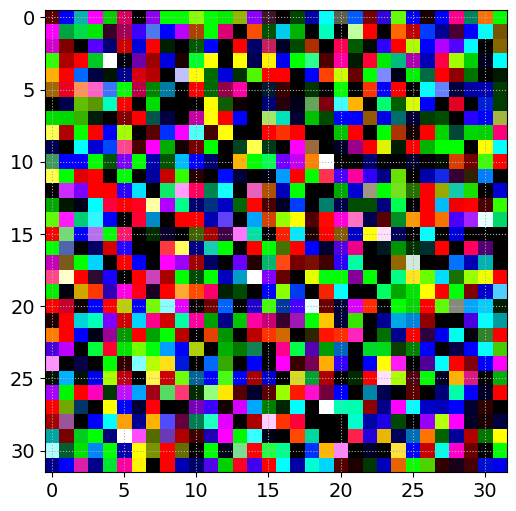

In [28]:
inputs = torch.randn(100, 3, 32, 32)
print(inputs.shape)

plt.imshow(inputs[0].permute(1, 2, 0))
plt.show()

In [29]:
inputs.shape

torch.Size([100, 3, 32, 32])

In [30]:
x1 = conv1(inputs)
x2 = relu(x1)
x3 = conv2(x2)
x4 = relu(x3)
x5 = maxpool(x4)

In [31]:
print(inputs.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)

torch.Size([100, 3, 32, 32])
torch.Size([100, 32, 30, 30])
torch.Size([100, 32, 30, 30])
torch.Size([100, 32, 28, 28])
torch.Size([100, 32, 28, 28])
torch.Size([100, 32, 14, 14])


In [32]:
features = nn.Sequential(
    conv1,
    relu,
    conv2,
    relu,
    maxpool
)

outputs = features(inputs)

In [33]:
print(outputs.shape)

torch.Size([100, 32, 14, 14])


In [34]:
flatten = nn.Flatten()

outputs2 = flatten(outputs)

print(outputs.shape)
print(outputs2.shape)

torch.Size([100, 32, 14, 14])
torch.Size([100, 6272])


In [35]:
def eval_loss(loader, device, net, criterion):
    for images, labels in loader:
        break

    inputs = images.to(device)
    labels = labels.to(device)

    outputs = net(inputs)
    loss = criterion(outputs, labels)

    return loss

In [37]:
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):
    from tqdm.notebook import tqdm

    base_epochs = len(history)
    batch_size_train = len(train_loader)
    batch_size_test = len(test_loader)

    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        net.train()

        for inputs, labels in tqdm(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            predicted = torch.max(outputs, 1)[1]
            train_acc += (predicted == labels).sum().item() / len(labels)

        avg_train_loss = train_loss / batch_size_train
        avg_train_acc = train_acc / batch_size_train

        net.eval()

        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            predicted = torch.max(outputs, 1)[1]
            val_acc += (predicted == labels).sum().item() / len(labels)

        avg_val_loss = val_loss / batch_size_test
        avg_val_acc = val_acc / batch_size_test

        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))

    return history

In [38]:
def evaluate_history(history):
    # 손실과 정확도 확인
    print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}')
    print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

    num_epochs = len(history)
    unit = num_epochs / 10

    # 학습 곡선 출력(손실)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,1], 'b', label='훈련')
    plt.plot(history[:,0], history[:,3], 'k', label='검증')
    plt.xticks(np.arange(0,num_epochs+1, unit))
    plt.xlabel('반복 횟수')
    plt.ylabel('손실')
    plt.title('학습 곡선(손실)')
    plt.legend()
    plt.show()

    # 학습 곡선 출력(정확도)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,2], 'b', label='훈련')
    plt.plot(history[:,0], history[:,4], 'k', label='검증')
    plt.xticks(np.arange(0,num_epochs+1,unit))
    plt.xlabel('반복 횟수')
    plt.ylabel('정확도')
    plt.title('학습 곡선(정확도)')
    plt.legend()
    plt.show()

In [39]:
# 이미지와 라벨 표시
def show_images_labels(loader, classes, net, device):

    # 데이터로더에서 처음 1세트를 가져오기
    for images, labels in loader:
        break
    # 표시 수는 50개
    n_size = min(len(images), 50)
    print("n_size = ", n_size)

    if net is not None:
      # 디바이스 할당
      inputs = images.to(device)
      labels = labels.to(device)

      # 예측 계산
      outputs = net(inputs)
      predicted = torch.max(outputs,1)[1]
      #images = images.to('cpu')

    # 처음 n_size개 표시
    plt.figure(figsize=(20, 15))
    for i in range(n_size):
        ax = plt.subplot(5, 10, i + 1)
        label_name = classes[labels[i]]
        # net이 None이 아닌 경우는 예측 결과도 타이틀에 표시함
        if net is not None:
          predicted_name = classes[predicted[i]]
          # 정답인지 아닌지 색으로 구분함
          if label_name == predicted_name:
            c = 'k'
          else:
            c = 'b'
          ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
        # net이 None인 경우는 정답 라벨만 표시
        else:
          ax.set_title(label_name, fontsize=20)
        # 텐서를 넘파이로 변환
        image_np = images[i].numpy().copy()
        # 축의 순서 변경 (channel, row, column) -> (row, column, channel)
        img = np.transpose(image_np, (1, 2, 0))
        # 값의 범위를[-1, 1] -> [0, 1]로 되돌림
        img = (img + 1)/2
        # 결과 표시
        plt.imshow(img)
        ax.set_axis_off()
    plt.show()


In [41]:
def torch_seed(seed=123):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.detreministic = True
    torch.use_deterministic_algorithms = True

In [42]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
])

transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

In [43]:
data_root = './data'

train_set1 = datasets.CIFAR10(
    root = data_root,
    train = True,
    download = True,
    transform = transform1
)

test_set1 = datasets.CIFAR10(
    root = data_root,
    train = False,
    download = True,
    transform = transform1
)

train_set2 = datasets.CIFAR10(
    root = data_root,
    train = True,
    download = True,
    transform = transform2
)

test_set2 = datasets.CIFAR10(
    root = data_root,
    train = False,
    download = True,
    transform = transform2
)

100%|██████████| 170498071/170498071 [00:19<00:00, 8719829.91it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [45]:
print(len(train_set1))
print(len(test_set1))

50000
10000


In [46]:
image1, label1 = train_set1[0]
image2, label2 = train_set2[0]

print(image1.shape)
print(image2.shape)

torch.Size([3072])
torch.Size([3, 32, 32])


In [47]:
batch_size = 100

train_loader1 = DataLoader(train_set1, batch_size=batch_size, shuffle=True)
test_loader1 = DataLoader(test_set1, batch_size=batch_size, shuffle=False)

train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)
test_loader2 = DataLoader(test_set2, batch_size=batch_size, shuffle=False)

In [49]:
print(len(train_loader1))
print(len(test_loader1))
print(len(train_loader1))
print(len(test_loader2))

500
100
500
100


In [51]:
for images1, labels1 in train_loader1:
    break

for images2, labels2 in train_loader2:
    break

print(images1.shape)
print(images2.shape)
print()
print(labels1.shape)
print(labels2.shape)

torch.Size([100, 3072])
torch.Size([100, 3, 32, 32])

torch.Size([100])
torch.Size([100])


n_size =  50


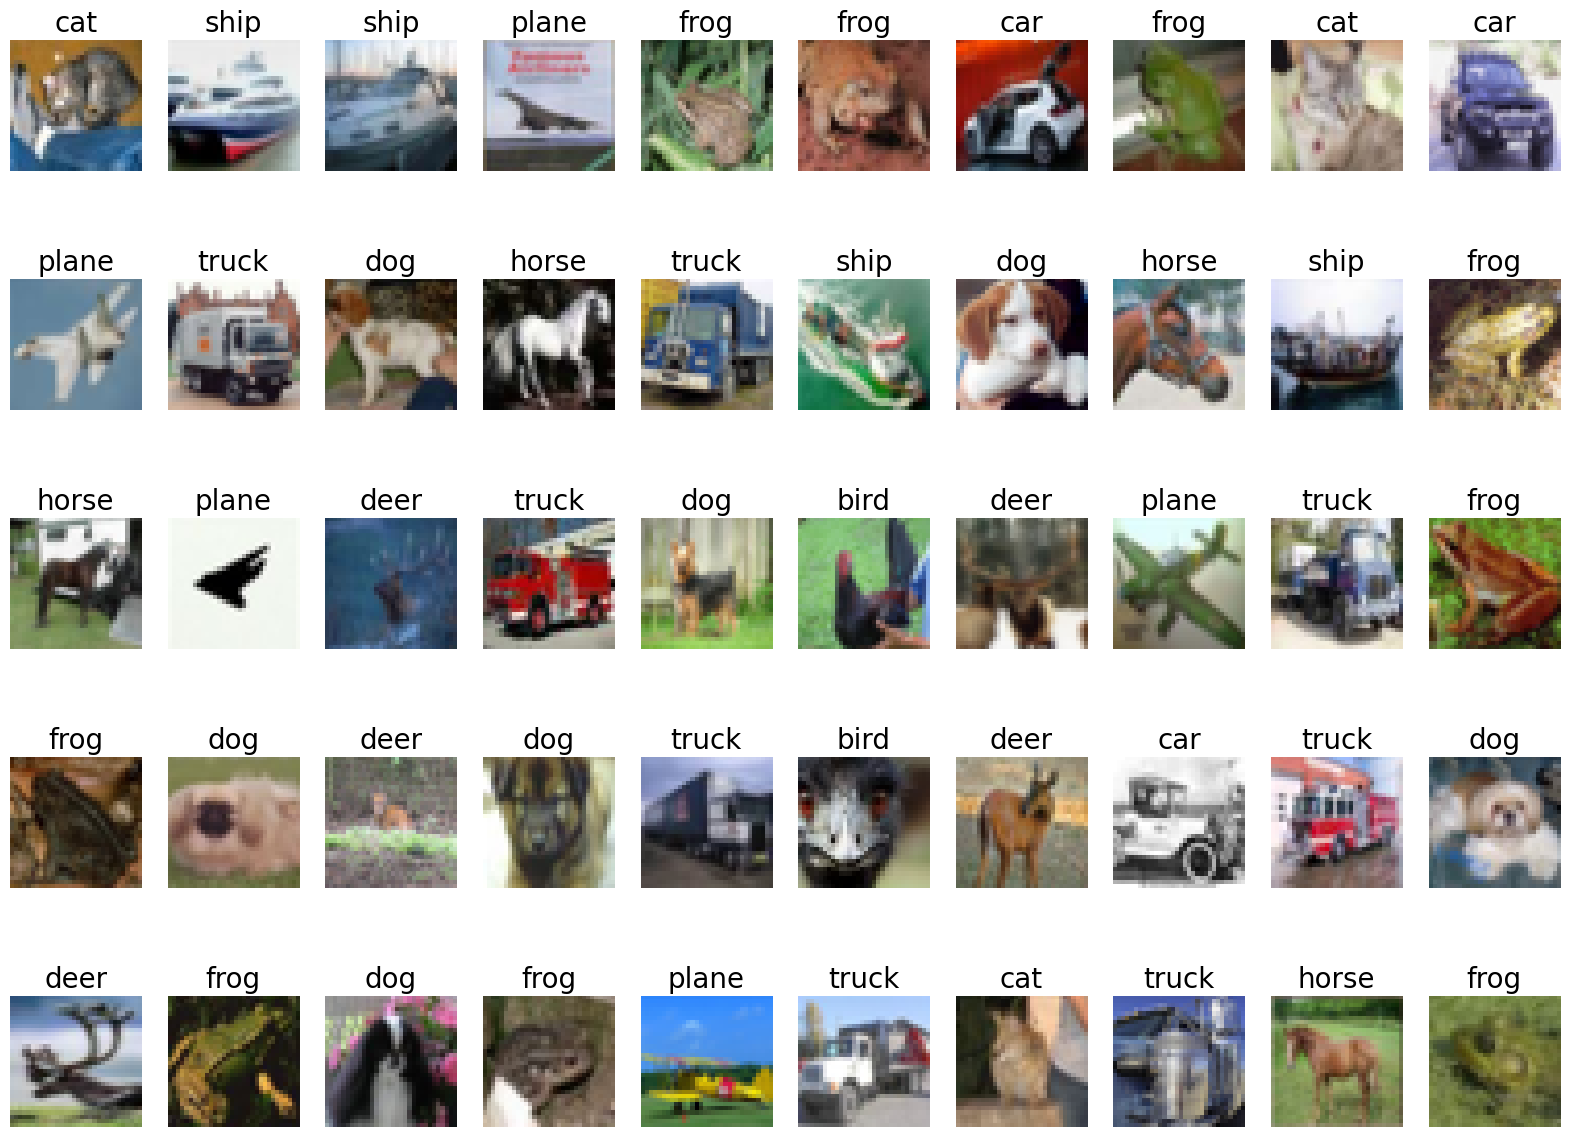

In [52]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

show_images_labels(test_loader2, classes, None, None)

In [56]:
n_input = image1.view(-1).shape[0]
n_output = len(set(list(labels1.data.numpy())))
n_hidden = 128

print(n_input, n_hidden, n_output)

3072 128 10


In [57]:
class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [58]:
net = Net(n_input, n_output, n_hidden).to(device)

criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [61]:
print(net)
print(net.l1)
print(net.l2)
print(net.relu)

Net(
  (l1): Linear(in_features=3072, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)
Linear(in_features=3072, out_features=128, bias=True)
Linear(in_features=128, out_features=10, bias=True)
ReLU(inplace=True)


In [62]:
summary(net, (100, 3072), depth=1)

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [100, 10]                 --
├─Linear: 1-1                            [100, 128]                393,344
├─ReLU: 1-2                              [100, 128]                --
├─Linear: 1-3                            [100, 10]                 1,290
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
Total mult-adds (M): 39.46
Input size (MB): 1.23
Forward/backward pass size (MB): 0.11
Params size (MB): 1.58
Estimated Total Size (MB): 2.92

In [63]:
loss = eval_loss(test_loader1, device, net, criterion)

In [64]:
torch_seed()

net = Net(n_input, n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 10
history = np.zeros((0, 5))

history = fit(net, optimizer, criterion, num_epochs, train_loader1, test_loader1, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/10], loss: 1.94965 acc: 0.32214 val_loss: 1.79426, val_acc: 0.37720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.73836 acc: 0.39578 val_loss: 1.68423, val_acc: 0.41780


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/10], loss: 1.65494 acc: 0.42406 val_loss: 1.62214, val_acc: 0.43830


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/10], loss: 1.60227 acc: 0.44270 val_loss: 1.58251, val_acc: 0.45140


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/10], loss: 1.56316 acc: 0.45516 val_loss: 1.55313, val_acc: 0.46180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/10], loss: 1.53235 acc: 0.46798 val_loss: 1.52969, val_acc: 0.46870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/10], loss: 1.50487 acc: 0.47698 val_loss: 1.51214, val_acc: 0.47420


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/10], loss: 1.48010 acc: 0.48648 val_loss: 1.49291, val_acc: 0.47790


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/10], loss: 1.45691 acc: 0.49584 val_loss: 1.47967, val_acc: 0.48650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/10], loss: 1.43485 acc: 0.50492 val_loss: 1.46334, val_acc: 0.48930


초기상태 : 손실 : 1.79426  정확도 : 0.37720
최종상태 : 손실 : 1.46334  정확도 : 0.48930


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.

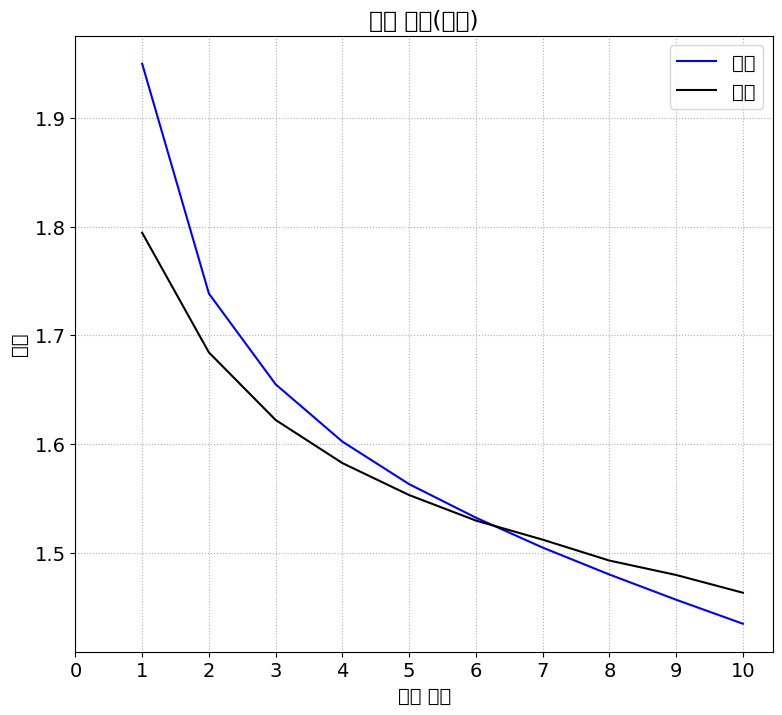

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


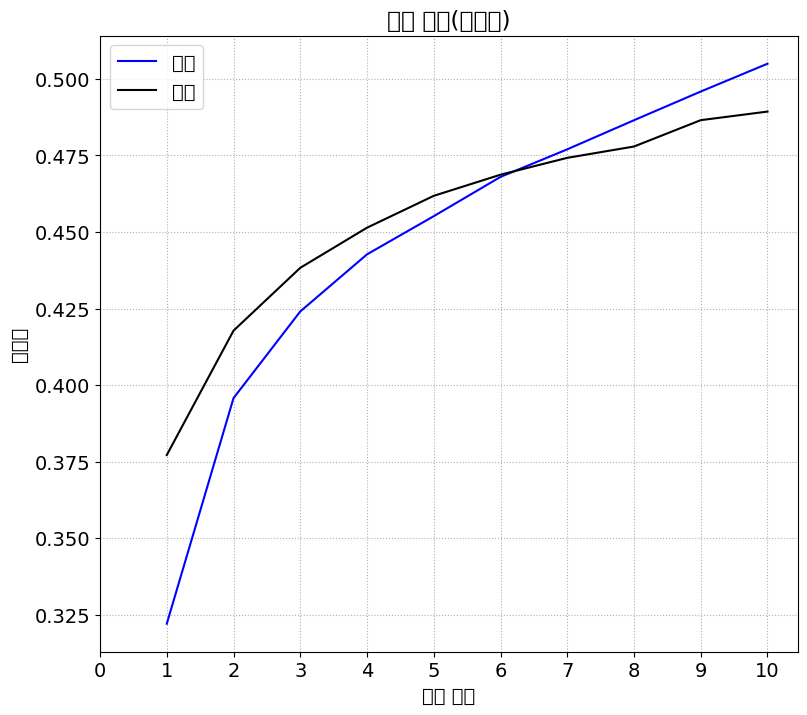

In [65]:
evaluate_history(history)

In [66]:
class CNN(nn.Module):
    def __init__(self, n_output, n_hidden):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d((2, 2))
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(6272, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool
        )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [67]:
net = CNN(n_output, n_hidden).to(device)

criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [68]:
print(net)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=6272, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=6272, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [72]:
print(net.features)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
)


In [73]:
summary(net, (100, 3, 32, 32), depth=2)

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [100, 10]                 --
├─Sequential: 1-1                        [100, 32, 14, 14]         9,248
│    └─Conv2d: 2-1                       [100, 32, 30, 30]         896
├─Sequential: 1-4                        --                        (recursive)
│    └─ReLU: 2-2                         [100, 32, 30, 30]         --
├─Sequential: 1-5                        --                        (recursive)
│    └─Conv2d: 2-3                       [100, 32, 28, 28]         9,248
├─Sequential: 1-4                        --                        (recursive)
│    └─ReLU: 2-4                         [100, 32, 28, 28]         --
├─Sequential: 1-5                        --                        (recursive)
│    └─MaxPool2d: 2-5                    [100, 32, 14, 14]         --
├─Flatten: 1-6                           [100, 6272]               --
├─Sequential: 1-7                        [

In [74]:
loss = eval_loss(test_loader2, device, net, criterion)

In [75]:
torch_seed()

net = CNN(n_output, n_hidden).to(device)
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10
history2 = np.zeros((0, 5))
history2 = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader2, device, history2)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/10], loss: 2.08247 acc: 0.26118 val_loss: 1.86586, val_acc: 0.34700


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.78079 acc: 0.37310 val_loss: 1.67646, val_acc: 0.40940


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/10], loss: 1.61307 acc: 0.43056 val_loss: 1.52976, val_acc: 0.46000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/10], loss: 1.48521 acc: 0.47360 val_loss: 1.44846, val_acc: 0.48890


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/10], loss: 1.40784 acc: 0.49970 val_loss: 1.36921, val_acc: 0.51300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/10], loss: 1.34982 acc: 0.52012 val_loss: 1.33326, val_acc: 0.52600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/10], loss: 1.30349 acc: 0.53758 val_loss: 1.29197, val_acc: 0.53910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/10], loss: 1.25273 acc: 0.55448 val_loss: 1.25237, val_acc: 0.55250


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/10], loss: 1.20539 acc: 0.57360 val_loss: 1.23475, val_acc: 0.56290


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/10], loss: 1.15818 acc: 0.59130 val_loss: 1.18431, val_acc: 0.57940


초기상태 : 손실 : 1.86586  정확도 : 0.34700
최종상태 : 손실 : 1.18431  정확도 : 0.57940


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.

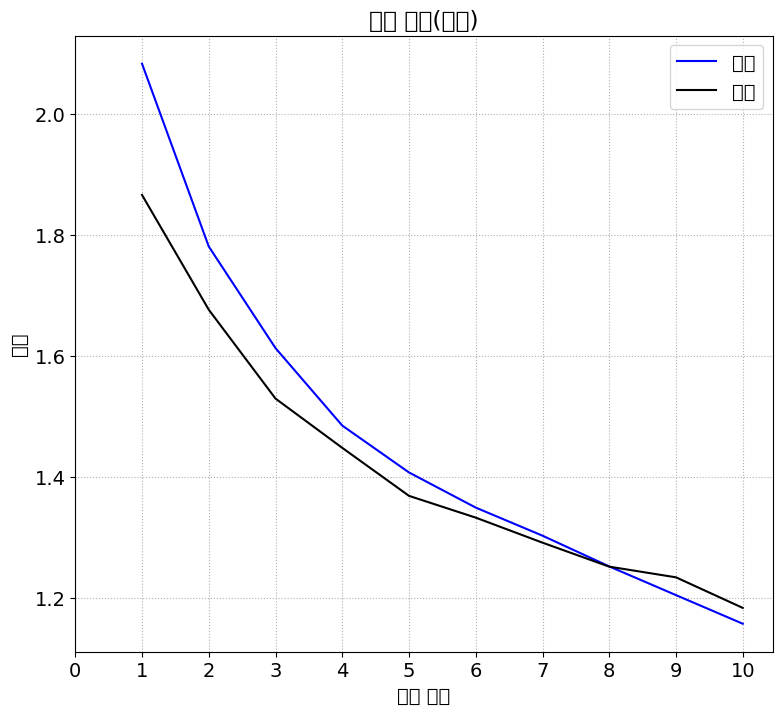

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


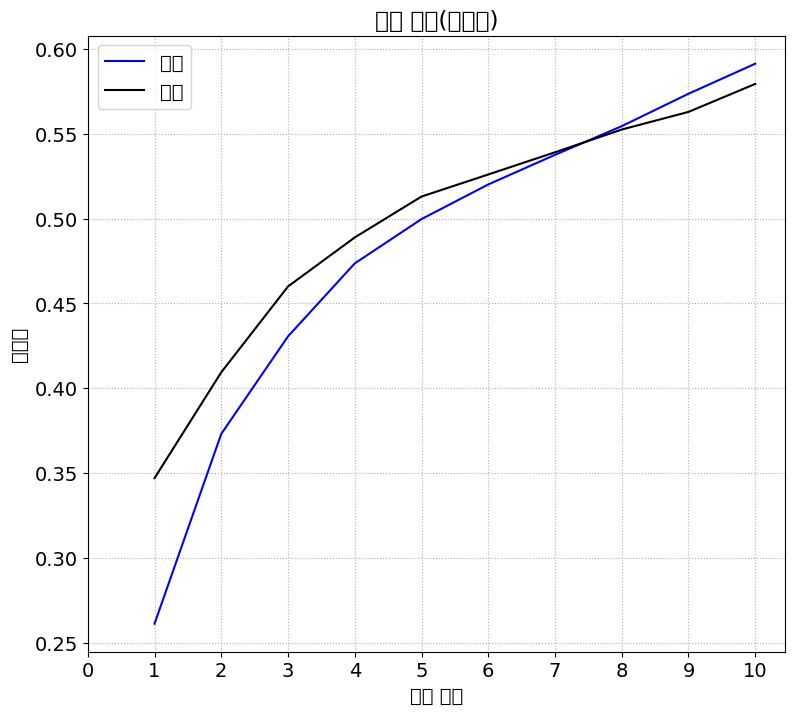

In [77]:
evaluate_history(history2)

n_size =  50


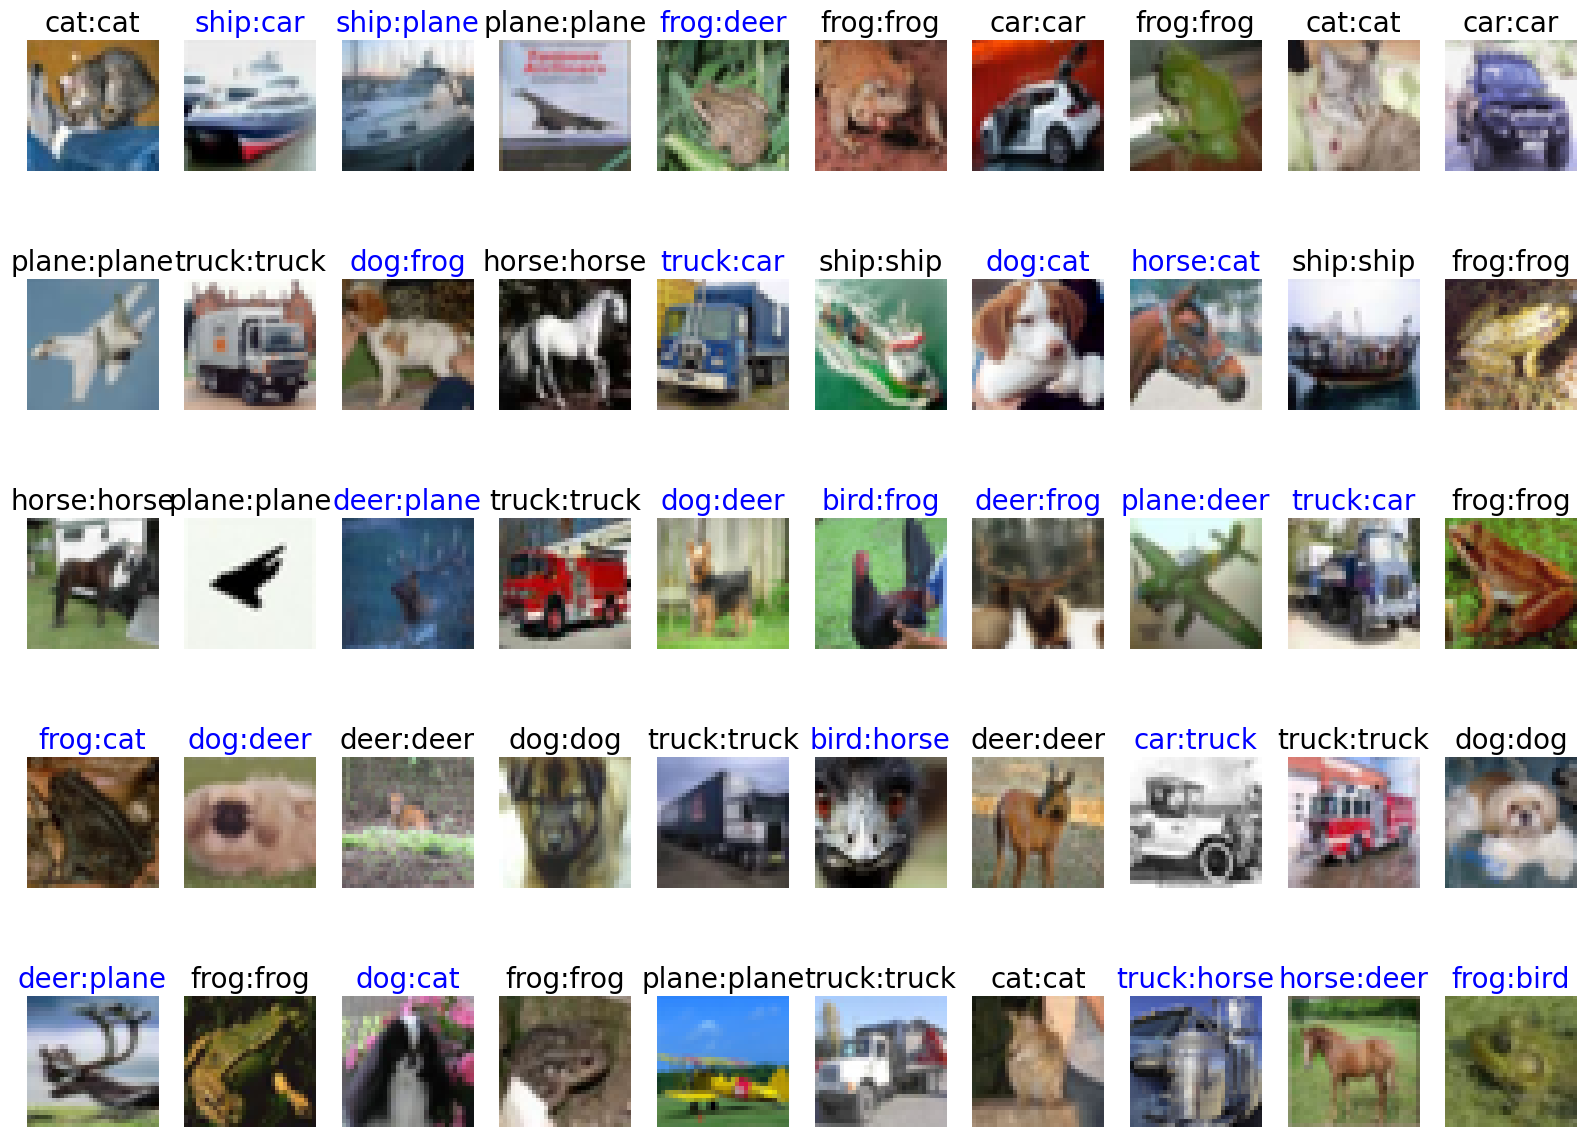

In [78]:
show_images_labels(test_loader2, classes, net, device)